In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')

%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd
import seaborn as sns
import numpy as np
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('dataset_full.csv', index_col=0, encoding='cp1251')
# Checking titles
pattern = re.compile('(\d{4})') 
ser = pd.Series(index=df.index)
for j,i in enumerate(df['title']):
    result = pattern.search(str(i))
    if result is None:
        description_res = pattern.search(df.loc[j, 'descr'])
        if description_res is None:
            ser[j] = None
        else:
            ser[j] = int(description_res.group(1))
    else:
        ser[j] = int(result.group(1))
df.loc[:, 'date'] = ser

In [3]:
'Coins without production date = ' + str(df.shape[0] - df.dropna().shape[0])

'Coins without production date = 10022'

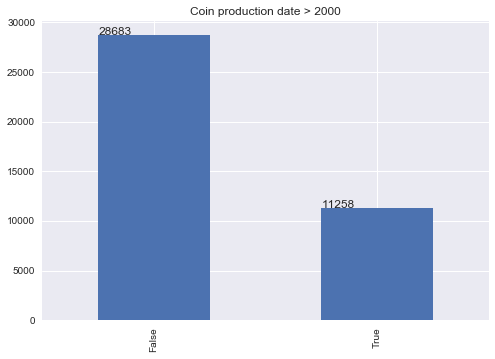

In [4]:
figure = (df['date'] > 2000).value_counts().plot.bar(title='Coin production date > 2000')
for label in figure.patches:
    figure.annotate(str(int(label.get_height())), (label.get_x(), label.get_height()))

In [5]:
'Coins production date > 2000 = ' + str((df['date'] > 2000).value_counts()[True])

'Coins production date > 2000 = 11258'